In [58]:
import numpy as np
import pandas as pd 
import datetime
from tqdm import tqdm
import pandas_datareader.naver as web_naver
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(20,10)})

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
start = '2008-12-01'
end = '2021-12-31'

In [61]:
price_quarter=pd.read_csv('price_panel_quarter.csv',index_col=0,parse_dates=True)
price_quarter.head()

,010780,004987,336260,008020,000835,035000,020000,003925,011200,039570,...,086790,145720,036460,001720,009190,074610,007690,030210,090435,012320
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-30,4291,2810.0,NaN,2280.0,12700.0,10000,7850,237000,218043,NaN,...,19500,NaN,55583,23450,92655,1811,17044,3200,14130,48359
2009-03-31,3677,3210.0,NaN,2385.0,13750.0,8320,8290,200000,158390,NaN,...,20800,NaN,39053,36200,175439,1742,23706,3750,13228,38535
2009-06-30,4797,5590.0,NaN,2895.0,17250.0,13400,10650,215000,143693,NaN,...,27400,NaN,45723,42100,128316,2224,25488,4285,17487,46356
2009-09-30,5047,7450.0,NaN,2940.0,21150.0,10650,14100,258500,163679,NaN,...,40600,NaN,51523,38200,128634,2224,19833,4995,24051,47215
2009-12-30,5136,9300.0,NaN,2880.0,22000.0,11950,16100,282500,156915,NaN,...,32900,NaN,46980,36600,116217,2086,21343,4050,29964,46356


In [62]:
market_cap=pd.read_csv('market_cap.csv',index_col=0,parse_dates=True)
quarter=list(price_quarter.index)
market_quarter=market_cap.loc[quarter]
market_quarter.head()

,010780,004987,336260,008020,000835,035000,020000,003925,011200,039570,...,086790,145720,036460,001720,009190,074610,007690,030210,090435,012320
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-30,114219995340,6.201473e+08,NaN,6.793775e+10,5.903789e+10,175714930000,193345500000,39498894000,4937016795900,NaN,...,4131106063500,NaN,4443859325000,220107257650,39695310000,9983970230,127833552000,193005094400,148865403000,160617600000
2009-03-31,97878535500,7.084245e+08,NaN,7.106647e+10,6.391898e+10,137840842880,204182700000,33332400000,3586323521550,NaN,...,4406513134400,NaN,3122294204000,339781779400,75161910000,9604832120,177804849600,226177845000,139363356000,127987200000
2009-06-30,127667655000,1.233674e+09,NaN,8.626307e+10,8.018926e+10,222003280600,262309500000,35832330000,3253640449050,NaN,...,5804733648200,NaN,3655557323000,395160577700,68675230000,20018803740,191169266400,258445884220,184234133500,153964800000
2009-09-30,134306373060,1.644163e+09,NaN,8.760394e+10,9.831901e+10,176442905850,347283000000,43082127000,3706089427650,NaN,...,8601174675800,NaN,4119264383000,358554253400,68845640000,20018803740,148751769600,301268889540,253387920000,156816000000
2009-12-30,136689502620,2.052445e+09,NaN,8.581611e+10,1.022704e+11,197980537550,396543000000,47082015000,3553055214300,NaN,...,6969917409700,NaN,3756027186000,343536274200,62199650000,18780527220,160082470800,244272072600,315679117000,153964800000


In [71]:
def portfolio_construction(price,market_cap,start,end):
    rtn=np.log(price/price.shift(1))*100
    rtn=rtn.iloc[1:]
    date_return=dict()

    rtn=rtn.reindex(market_cap.index)
    for i in range(len(market_cap)):

        winners=market_cap.iloc[i].dropna().rank(method='first',ascending=False)\
        [(market_cap.iloc[i].dropna().rank(method='first',ascending=False)<end)&\
        (market_cap.iloc[i].dropna().rank(method='first',ascending=False)>=start)].index.values

        winners=list(winners)

        date_return[rtn.index[i]]=\
            [[np.dot(rtn.iloc[i].reindex(winners).fillna(-99).values,np.array([1/len(winners) for i in range(len(winners))]))],winners]

    return date_return

In [72]:
high_market_cap=portfolio_construction(price=price_quarter,market_cap=market_quarter,start=0,end=300)

In [73]:
middle_market_cap=portfolio_construction(price=price_quarter,market_cap=market_quarter,start=300,end=600)

In [74]:
low_market_cap=portfolio_construction(price=price_quarter,market_cap=market_quarter,start=600,end=900)

In [75]:
print('high_market_capital')
for i in range(1,len(high_market_cap.keys())):
    print(list(high_market_cap.keys())[i])
    sub=len([x for x in high_market_cap[list(high_market_cap.keys())[i]][1] if x not in high_market_cap[list(high_market_cap.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( high_market_cap[list(high_market_cap.keys())[i-1]][1])}')
    print('편입',[x for x in high_market_cap[list(high_market_cap.keys())[i]][1] if x not in high_market_cap[list(high_market_cap.keys())[i-1]][1]])
    print('퇴출',[x for x in high_market_cap[list(high_market_cap.keys())[i-1]][1] if x not in high_market_cap[list(high_market_cap.keys())[i]][1]])



high_market_capital
2009-03-31 00:00:00
교체비율: 0.056856187290969896
편입 ['009440', '036530', '004430', '003190', '004710', '001060', '108070', '025540', '000360', '005500', '014790', '015890', '005090', '011930', '003520', '008040', '105630']
퇴출 ['035000', '000180', '006220', '004960', '001725', '100220', '092230', '010960', '033920', '002300', '003940', '012090', '103160', '001370', '003640', '090435', '012320']
2009-06-30 00:00:00
교체비율: 0.056856187290969896
편입 ['035000', '005560', '001250', '015590', '071970', '004130', '003090', '001940', '033660', '092230', '108670', '002300', '900050', '064960', '051310', '003640', '090435']
퇴출 ['015860', '001470', '000230', '004710', '001060', '002390', '003200', '009290', '014820', '000360', '034310', '015890', '015360', '003120', '032390', '011930', '003520']
2009-09-30 00:00:00
교체비율: 0.030100334448160536
편입 ['005850', '028100', '009420', '001060', '010050', '004960', '021960', '111770', '012090']
퇴출 ['035000', '009440', '007340', '001790', '0421

In [76]:
print('middle_market_capital')
for i in range(1,len(middle_market_cap.keys())):
    print(list(middle_market_cap.keys())[i])
    sub=len([x for x in middle_market_cap[list(middle_market_cap.keys())[i]][1] if x not in middle_market_cap[list(middle_market_cap.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( middle_market_cap[list(middle_market_cap.keys())[i-1]][1])}')
    print('편입',[x for x in middle_market_cap[list(middle_market_cap.keys())[i]][1] if x not in middle_market_cap[list(middle_market_cap.keys())[i-1]][1]])
    print('퇴출',[x for x in middle_market_cap[list(middle_market_cap.keys())[i-1]][1] if x not in middle_market_cap[list(middle_market_cap.keys())[i]][1]])

middle_market_capital
2009-03-31 00:00:00
교체비율: 0.12666666666666668
편입 ['035000', '033180', '000180', '00341A', '011330', '024100', '015110', '006220', '016590', '078520', '004960', '001725', '063160', '008400', '027740', '079660', '020760', '100220', '004060', '092230', '006125', '010960', '002870', '014440', '002720', '033920', '002300', '009320', '003940', '012090', '000157', '004540', '103160', '001370', '005900', '003640', '090435', '012320']
퇴출 ['008720', '009440', '012800', '000890', '036530', '004430', '003190', '058730', '007190', '003580', '004710', '008900', '001060', '011050', '008870', '006490', '004820', '006340', '006090', '083420', '025540', '021820', '011800', '000360', '011400', '005500', '014790', '015890', '001047', '002797', '000105', '097957', '005090', '006070', '011930', '003520', '011090', '008040']
2009-06-30 00:00:00
교체비율: 0.12666666666666668
편입 ['015860', '012800', '001470', '028100', '000230', '007190', '102260', '003580', '004710', '008900', '001060', '002

In [77]:
print('middle_market_capital')
for i in range(1,len(low_market_cap.keys())):
    print(list(low_market_cap.keys())[i])
    sub=len([x for x in low_market_cap[list(low_market_cap.keys())[i]][1] if x not in low_market_cap[list(low_market_cap.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( low_market_cap[list(low_market_cap.keys())[i-1]][1])}')
    print('편입',[x for x in low_market_cap[list(low_market_cap.keys())[i]][1] if x not in low_market_cap[list(low_market_cap.keys())[i-1]][1]])
    print('퇴출',[x for x in low_market_cap[list(low_market_cap.keys())[i-1]][1] if x not in low_market_cap[list(low_market_cap.keys())[i]][1]])

middle_market_capital
2009-03-31 00:00:00
교체비율: 0.08666666666666667
편입 ['008720', '012800', '000890', '001689', '058730', '007190', '003580', '008900', '011050', '008870', '006490', '107590', '004820', '001065', '006340', '006090', '083420', '021820', '011800', '011400', '108890', '109070', '002797', '000105', '006070', '011090']
퇴출 ['033180', '004105', '00341A', '011330', '024100', '015110', '016590', '078520', '063160', '008400', '027740', '006345', '079660', '005760', '020760', '000685', '004060', '006125', '002870', '014440', '002720', '009320', '000157', '093730', '004540', '005900']
2009-06-30 00:00:00
교체비율: 0.10333333333333333
편입 ['004987', '003925', '017180', '000950', '033180', '004410', '004989', '004105', '00341D', '005980', '007610', '003160', '015110', '003415', '001745', '006345', '006740', '900030', '020760', '010600', '000685', '011700', '001560', '090355', '016450', '000220', '014440', '002720', '000520', '000425', '005305']
퇴출 ['008405', '012800', '013200', '001190', 

In [78]:
kospi=web_naver.NaverDailyReader(symbols='KOSPI', start=start,end=end,adjust_price=True)
kospi=kospi.read()
kospi=kospi.astype(float)

In [79]:
kospi=kospi.loc[price_quarter.index,:]['Close']
kospi.head()

Date
2008-12-30    1124.47
2009-03-31    1206.26
2009-06-30    1390.07
2009-09-30    1673.14
2009-12-30    1682.77
Name: Close, dtype: float64

In [80]:
portfolio=pd.DataFrame(index=price_quarter.index)
portfolio['high_market_cap']=pd.Series(np.array([rtn[0] for rtn in list(high_market_cap.values())]).flatten(),index=high_market_cap.keys())
portfolio['middle_market_cap']=pd.Series(np.array([rtn[0] for rtn in list(middle_market_cap.values())]).flatten(),index=middle_market_cap.keys())
portfolio['low_market_cap']=pd.Series(np.array([rtn[0] for rtn in list(low_market_cap.values())]).flatten(),index=low_market_cap.keys())
portfolio['KOSPI']=np.log(kospi/kospi.shift(1))*100

In [81]:
print("mean","\n",portfolio.mean())
print("")
print("std","\n",portfolio.std())
print("")
print("skewness","\n",portfolio.skew())
print("")
print("kurtosis","\n",portfolio.kurtosis())
print("")
print("sharpe ratio","\n", portfolio.mean() / portfolio.std())

mean 
 high_market_cap     -0.501387
middle_market_cap   -0.435884
low_market_cap      -2.502717
KOSPI                1.872736
dtype: float64

std 
 high_market_cap      16.257968
middle_market_cap    16.783175
low_market_cap       16.396394
KOSPI                 8.082488
dtype: float64

skewness 
 high_market_cap     -4.421911
middle_market_cap   -3.998876
low_market_cap      -4.012933
KOSPI               -0.301825
dtype: float64

kurtosis 
 high_market_cap      26.265735
middle_market_cap    22.963391
low_market_cap       23.315489
KOSPI                 1.532636
dtype: float64

sharpe ratio 
 high_market_cap     -0.030839
middle_market_cap   -0.025972
low_market_cap      -0.152638
KOSPI                0.231703
dtype: float64


<AxesSubplot:xlabel='Date'>

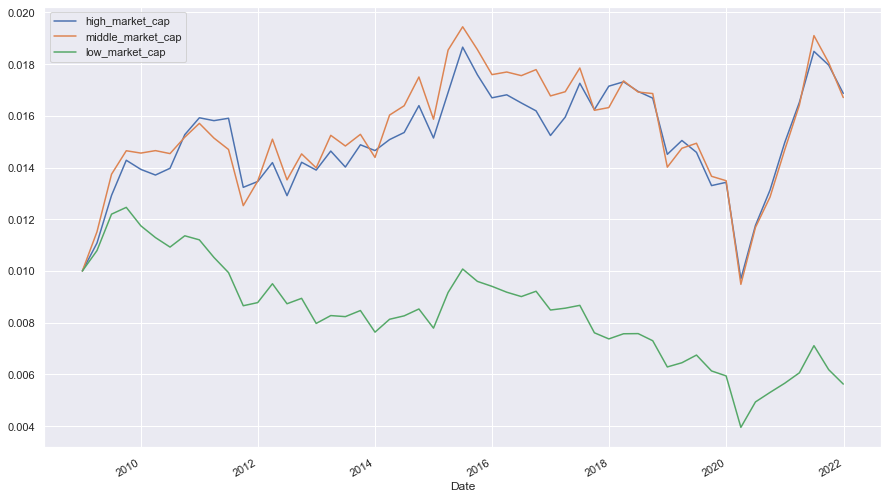

In [82]:
cum_rtn=portfolio[['high_market_cap','middle_market_cap','low_market_cap']]/100
(1+cum_rtn).cumprod().plot(figsize=(15,9))

marketcap에 당시 거래량을 나누어보자

In [83]:
volume=pd.read_csv('volume_panel.csv',index_col=0,parse_dates=True)
volume_quarter=volume.loc[quarter]
volume_quarter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2008-12-30 to 2021-12-30
Columns: 1205 entries, 006125 to 004370
dtypes: float64(515), int64(690)
memory usage: 499.4 KB


In [84]:
market_quarter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2008-12-30 to 2021-12-30
Columns: 1205 entries, 010780 to 012320
dtypes: float64(546), int64(659)
memory usage: 499.4 KB


In [85]:
m_v=market_quarter.copy()/volume_quarter.copy()

In [86]:
def m_v_portfolio_construction(price,m_v,start,end):

    rtn=np.log(price/price.shift(1))
    rtn=rtn.iloc[1:].copy()
    date_return_ticker=dict()
    rtn=rtn.reindex(m_v.index)
    for i in range(len(m_v)):
        winners=m_v.iloc[i].dropna().rank(method='first',ascending=False)\
            [(m_v.iloc[i].dropna().rank(method='first',ascending=False)<end)&\
                (m_v.iloc[i].dropna().rank(method='first',ascending=False)>=start)].index.values

        date_return_ticker[rtn.index[i]]=\
            [[np.dot(rtn.iloc[i].reindex(winners).fillna(-99).values,np.array([1/len(winners) for i in range(len(winners))]))],winners]

    return date_return_ticker
    

In [96]:
high_m_v=m_v_portfolio_construction(price=price_quarter,m_v=m_v,start=0,end=300)

In [97]:
middle_m_v=m_v_portfolio_construction(price=price_quarter,m_v=m_v,start=300,end=600)

In [98]:
low_m_v=m_v_portfolio_construction(price=price_quarter,m_v=m_v,start=600,end=900)

In [99]:
print('high_m_v_capital')
for i in range(1,len(high_m_v.keys())):
    print(list(high_m_v.keys())[i])
    sub=len([x for x in high_m_v[list(high_m_v.keys())[i]][1] if x not in high_m_v[list(high_m_v.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( high_m_v[list(high_m_v.keys())[i-1]][1])}')
    print('편입',[x for x in high_m_v[list(high_m_v.keys())[i]][1] if x not in high_m_v[list(high_m_v.keys())[i-1]][1]])
    print('퇴출',[x for x in high_m_v[list(high_m_v.keys())[i-1]][1] if x not in high_m_v[list(high_m_v.keys())[i]][1]])



high_m_v_capital
2009-03-31 00:00:00
교체비율: 0.23076923076923078
편입 ['000070', '000225', '000227', '000320', '000425', '000430', '000490', '000545', '000685', '000790', '001370', '001755', '001790', '001800', '001970', '001975', '002170', '002410', '002540', '002870', '003060', '003415', '003990', '004135', '004230', '004700', '004820', '005090', '005180', '005745', '006070', '007050', '007980', '008400', '008720', '008975', '009690', '010620', '013200', '013365', '013367', '013700', '014285', '014300', '016580', '017555', '021820', '024870', '025540', '044450', '051905', '051910', '051915', '066570', '068290', '075180', '078935', '081940', '082250', '083120', '083580', '084160', '084670', '096770', '096775', '099340', '101060', '107590', '108890']
퇴출 ['000105', '000220', '000480', '000650', '000860', '000995', '000997', '001047', '001275', '001529', '001685', '001725', '001795', '002210', '002355', '002535', '003080', '003495', '003600', '004100', '004137', '004890', '005030', '005389',

In [100]:
print('middle_m_v_capital')
for i in range(1,len(middle_m_v.keys())):
    print(list(middle_m_v.keys())[i])
    sub=len([x for x in middle_m_v[list(middle_m_v.keys())[i]][1] if x not in middle_m_v[list(middle_m_v.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( middle_m_v[list(middle_m_v.keys())[i-1]][1])}')
    print('편입',[x for x in middle_m_v[list(middle_m_v.keys())[i]][1] if x not in middle_m_v[list(middle_m_v.keys())[i-1]][1]])
    print('퇴출',[x for x in middle_m_v[list(middle_m_v.keys())[i-1]][1] if x not in middle_m_v[list(middle_m_v.keys())[i]][1]])



middle_m_v_capital
2009-03-31 00:00:00
교체비율: 0.35333333333333333
편입 ['000105', '000220', '000370', '000480', '000650', '000860', '000997', '001065', '001067', '001120', '001275', '001450', '001529', '001630', '001685', '001725', '001745', '001795', '002025', '002250', '002355', '002535', '003080', '003220', '003475', '003495', '003570', '003580', '003600', '003720', '004100', '004137', '004200', '004710', '004890', '004989', '005010', '005385', '005389', '005500', '005610', '005830', '005850', '005900', '006090', '006120', '006380', '006390', '007160', '008040', '008770', '009140', '009200', '009280', '009380', '009580', '009970', '010060', '010100', '010140', '010660', '010780', '011160', '011300', '011390', '011785', '011790', '012030', '012330', '012580', '012805', '013005', '013360', '014280', '014580', '014830', '014990', '015350', '016420', '016590', '017670', '019490', '019685', '024070', '024900', '027390', '030200', '032390', '034020', '034300', '035150', '036460', '037270', '

In [101]:
print('low_m_v_capital')
for i in range(1,len(low_m_v.keys())):
    print(list(low_m_v.keys())[i])
    sub=len([x for x in low_m_v[list(low_m_v.keys())[i]][1] if x not in low_m_v[list(low_m_v.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( low_m_v[list(low_m_v.keys())[i-1]][1])}')
    print('편입',[x for x in low_m_v[list(low_m_v.keys())[i]][1] if x not in low_m_v[list(low_m_v.keys())[i-1]][1]])
    print('퇴출',[x for x in low_m_v[list(low_m_v.keys())[i-1]][1] if x not in low_m_v[list(low_m_v.keys())[i]][1]])



low_m_v_capital
2009-03-31 00:00:00
교체비율: 0.3
편입 ['000140', '000145', '000995', '001200', '001250', '001500', '001550', '001600', '002210', '002920', '003010', '003350', '003540', '003560', '004060', '004310', '004380', '004430', '004740', '004830', '004835', '004940', '005030', '005680', '005690', '005750', '005940', '005945', '005950', '006125', '006370', '006405', '006805', '006890', '007190', '007200', '007630', '008250', '008260', '008775', '009420', '009680', '010040', '010960', '011155', '011280', '011420', '011700', '011760', '011800', '012800', '014130', '014350', '014530', '014915', '015020', '015230', '015890', '016450', '016510', '017900', '018880', '023150', '023800', '024100', '024110', '025820', '025850', '025890', '027970', '032640', '033240', '036530', '036585', '053000', '063160', '067830', '073240', '077500', '078000', '078520', '084010', '084695', '085310', '090350', '094280', '100840', '105630', '108070', '109070']
퇴출 ['000227', '000370', '000425', '000430', '00054

In [105]:
portfolio=pd.DataFrame(index=price_quarter.index)
portfolio['high_m_v']=pd.Series(np.array([rtn[0] for rtn in list(high_m_v.values())]).flatten(),index=high_m_v.keys())
portfolio['middle_m_v']=pd.Series(np.array([rtn[0] for rtn in list(middle_m_v.values())]).flatten(),index=middle_m_v.keys())
portfolio['low_m_v']=pd.Series(np.array([rtn[0] for rtn in list(low_m_v.values())]).flatten(),index=low_m_v.keys())
portfolio['KOSPI']=np.log(kospi/kospi.shift(1))*100

In [106]:
print("mean","\n",portfolio.mean())
print("")
print("std","\n",portfolio.std())
print("")
print("skewness","\n",portfolio.skew())
print("")
print("kurtosis","\n",portfolio.kurtosis())
print("")
print("sharpe ratio","\n", portfolio.mean() / portfolio.std())

mean 
 high_m_v     -2.168533
middle_m_v   -2.414292
low_m_v      -2.518634
KOSPI         1.872736
dtype: float64

std 
 high_m_v      13.561613
middle_m_v    13.530763
low_m_v       13.523503
KOSPI          8.082488
dtype: float64

skewness 
 high_m_v     -7.271760
middle_m_v   -7.265782
low_m_v      -7.253641
KOSPI        -0.301825
dtype: float64

kurtosis 
 high_m_v      52.917225
middle_m_v    52.858122
low_m_v       52.736348
KOSPI          1.532636
dtype: float64

sharpe ratio 
 high_m_v     -0.159902
middle_m_v   -0.178430
low_m_v      -0.186241
KOSPI         0.231703
dtype: float64


<AxesSubplot:xlabel='Date'>

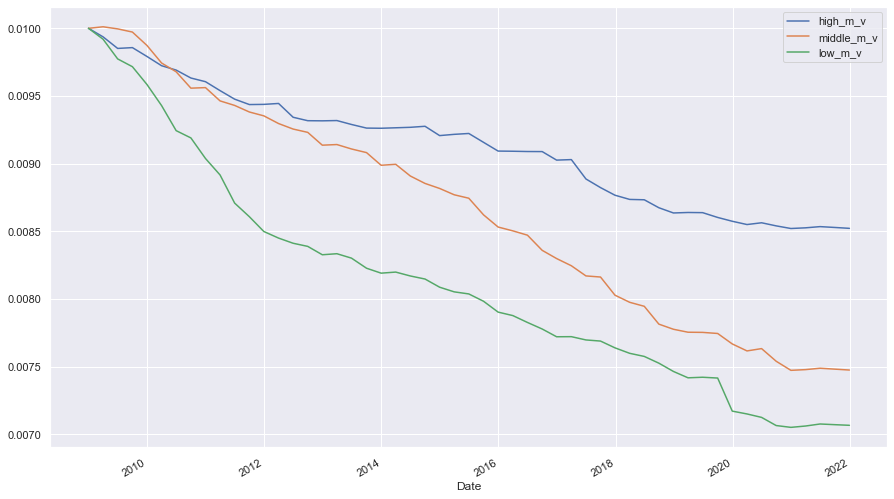

In [107]:
cum_rtn=portfolio[['high_m_v','middle_m_v','low_m_v']]/100
(1+cum_rtn).cumprod().plot(figsize=(15,9))